# Inspect results

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pathlib import Path

In [3]:
data_path = Path("./outputs/MINE.2025.01:1/")

In [4]:
method = "csv"

if method == "bebeziana":
    import bebeziana
    data = bebeziana.read(data_path, ["setup.yaml", "results.yaml"])
    
elif method == "csv":
    data = pd.read_csv(data_path / "data.csv")

In [5]:
data["absolute_error"] = (data["distribution.mutual_information"] - data["mutual_information.mean"]).abs()

In [6]:
data

,Unnamed: 0,distribution._target_,distribution.dimensionality,distribution.mutual_information,estimator._target_,estimator.device,estimator.n_train_steps,n_runs,n_samples,mutual_information.mean,mutual_information.std,mutual_information.values,distribution.X_dim,distribution.Y_dim,distribution.degrees_of_freedom,distribution.base_rv._target_,absolute_error
0,0,mutinfo.distributions.base.LogGammaExponential,3.0,3.0,mutinfo.estimators.neural.mine.MINE,cuda:0,10000,10,10000,2.266993,1.291468,"[2.8922113788604737, 2.757027547454834, 2.8202...",NaN,NaN,NaN,NaN,0.733007
1,1,mutinfo.distributions.base.LogGammaExponential,3.0,3.0,mutinfo.estimators.neural.mine.MINE,cuda:0,10000,10,500,3.296493,0.339206,"[2.67021107673645, 3.597027540206909, 3.229006...",NaN,NaN,NaN,NaN,0.296493
2,2,mutinfo.distributions.base.LogGammaExponential,3.0,3.0,mutinfo.estimators.neural.mine.MINE,cuda:0,10000,10,100,2.161198,5.126915,"[4.67233943939209, -12.870549201965332, 2.3131...",NaN,NaN,NaN,NaN,0.838802
3,3,mutinfo.distributions.base.LogGammaExponential,3.0,3.0,mutinfo.estimators.neural.mine.MINE,cuda:0,10000,10,2000,2.887205,0.221182,"[3.039616708755493, 2.8444424781799316, 2.9134...",NaN,NaN,NaN,NaN,0.112795
4,4,mutinfo.distributions.base.LogGammaExponential,3.0,3.0,mutinfo.estimators.neural.mine.MINE,cuda:0,10000,10,1000,2.973015,0.243513,"[2.5842554931640627, 2.4559902534484865, 2.928...",NaN,NaN,NaN,NaN,0.026985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,1885,mutinfo.distributions.base.SmoothedUniform,2.0,6.0,mutinfo.estimators.neural.mine.MINE,cuda:0,10000,10,500,5.826798,1.475401,"[5.853960990905762, 5.706761360168457, 4.77283...",NaN,NaN,NaN,NaN,0.173202
1886,1886,mutinfo.distributions.base.SmoothedUniform,2.0,6.0,mutinfo.estimators.neural.mine.MINE,cuda:0,10000,10,100,6.508148,5.403192,"[3.773427963256836, 4.212237358093262, 4.45420...",NaN,NaN,NaN,NaN,0.508148
1887,1887,mutinfo.distributions.base.SmoothedUniform,2.0,6.0,mutinfo.estimators.neural.mine.MINE,cuda:0,10000,10,2000,5.263723,0.509015,"[5.126800689697266, 5.301893341064453, 4.86441...",NaN,NaN,NaN,NaN,0.736277
1888,1888,mutinfo.distributions.base.SmoothedUniform,2.0,6.0,mutinfo.estimators.neural.mine.MINE,cuda:0,10000,10,1000,5.266357,0.502947,"[5.157838520050049, 5.444412399291992, 5.10574...",NaN,NaN,NaN,NaN,0.733643


In [7]:
data.columns

Index(['Unnamed: 0', 'distribution._target_', 'distribution.dimensionality',
       'distribution.mutual_information', 'estimator._target_',
       'estimator.device', 'estimator.n_train_steps', 'n_runs', 'n_samples',
       'mutual_information.mean', 'mutual_information.std',
       'mutual_information.values', 'distribution.X_dim', 'distribution.Y_dim',
       'distribution.degrees_of_freedom', 'distribution.base_rv._target_',
       'absolute_error'],
      dtype='object')

In [8]:
#print(data.groupby(["estimator._target_", "distribution._target_", "distribution.mutual_information", "estimator.k_neighbors"])["absolute_error"].mean().to_string())
print(data.groupby(["estimator._target_", "distribution._target_", "distribution.mutual_information"])[["absolute_error"]].mean().to_string())

                                                                                                                    absolute_error
estimator._target_                  distribution._target_                          distribution.mutual_information                
mutinfo.estimators.neural.mine.MINE mutinfo.distributions.base.CorrelatedNormal    0.0                                9.773619e-01
                                                                                   1.0                                6.275583e-01
                                                                                   2.0                                4.045350e-01
                                                                                   3.0                                2.208464e-01
                                                                                   4.0                                2.191108e-01
                                                                                   

In [13]:
data[
    (data["distribution._target_"] == "mutinfo.distributions.base.LogGammaExponential") &
    (data["n_samples"] == 10000)
].groupby(
    ["estimator._target_", "distribution._target_", "distribution.mutual_information"]
)[["mutual_information.mean"]].mean()

mutual_information.mean
estimator._target_                  distribution._target_                          distribution.mutual_information                         
mutinfo.estimators.neural.mine.MINE mutinfo.distributions.base.LogGammaExponential 0.0                                        -5.755410e-07
                                                                                   1.0                                         9.804857e-01
                                                                                   2.0                                         1.966758e+00
                                                                                   3.0                                         2.421119e+00
                                                                                   4.0                                         2.163668e+00
                                                                                   5.0                                         3.914048e+00
                                                                                   6.0                                         3.620621e+00
                                                                                   7.0                                         3.951821e+00
                                                                                   8.0                                         3.737144e+00
                                                                                   9.0                                         4.198961e+00
                                                                                   10.0                                        4.712811e+00

In [17]:
data_2 = data[
    (data["distribution._target_"] != "mutinfo.distributions.base.CorrelatedStudent")# &
    #(data["n_samples"] == 10000)
].groupby(
    ["n_samples"]
)[["absolute_error"]].mean()

In [24]:
data_2 = pd.DataFrame(data_2).reset_index()

In [25]:
import matplotlib.pyplot as plt

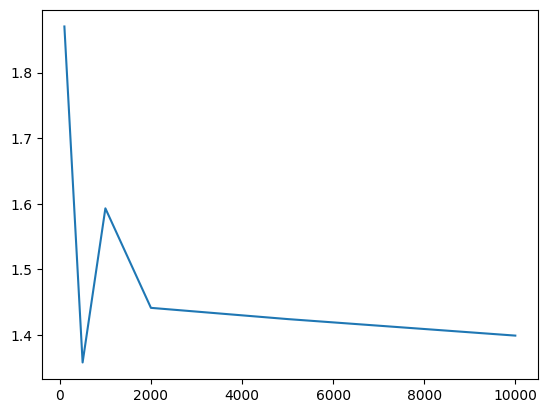

In [26]:
plt.plot(data_2["n_samples"], data_2["absolute_error"])